# Fake News Classifier

In [1]:
# import the necceasary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
# load the data
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

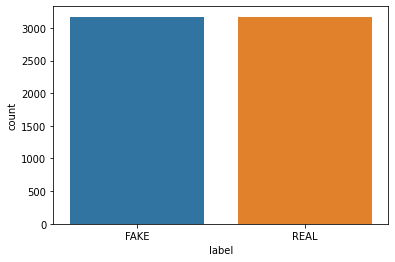

In [10]:
# checking the fake or real value
import seaborn as sns
sns.countplot(x = "label",data = df)

In [13]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [14]:
# Create a series to store the labels: y
y = df.label


In [15]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"],y,test_size = 0.33,random_state = 53)


In [16]:

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = "english")

In [18]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


TfidfVectorizer for text classification

In [19]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7)

In [20]:
# transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
# tranform the test data
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [23]:
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


In [24]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Inspecting the vectors

- to get the better idea of the vector we will convert them in pandas dataframe

In [26]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names_out())

In [27]:
print(count_df.head())

   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]


In [28]:
print(tfidf_df.head())

    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
1  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
2  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
3  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   
4  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...   

   حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56922 columns]


In [29]:

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [30]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


# Naive Bayes Classifier

Model with CountVectorizer

In [32]:
# import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [34]:
# Instantiate a Multinomial Naive Bayes Classifer
nb_classifier = MultinomialNB()

# fit the classifier to the traning data
nb_classifier.fit(count_train, y_train)

# create the predicted tags:
pred_train = nb_classifier.predict(count_train)
pred_test = nb_classifier.predict(count_test)

In [35]:
# accuracy score
print("The accuracy on training data: ", metrics.accuracy_score(y_train,pred_train))

print("The accuracy on testing data: ", metrics.accuracy_score(y_test,pred_test))

The accuracy on training data:  0.9467483506126296
The accuracy on testing data:  0.893352462936394


In [37]:
# calculate the confusion matrix: cm

cm = metrics.confusion_matrix(y_test,pred_test,labels = ["FAKE","REAL"])
cm

array([[ 865,  143],
       [  80, 1003]], dtype=int64)

model with TfidfVectorizer

In [46]:
# create a Multinomial Naive Bayes classifer
nb_classifier_tfidf = MultinomialNB()

# fit the classifier to the training data
nb_classifier_tfidf.fit(tfidf_train,y_train)

# predicted tags
pred_train_tfidf = nb_classifier_tfidf.predict(tfidf_train)
pred_test_tfidf = nb_classifier_tfidf.predict(tfidf_test)

In [47]:
# accuracy score
print("The accuracy on training data: ", metrics.accuracy_score(y_train,pred_train_tfidf))

print("The accuracy on testing data: ", metrics.accuracy_score(y_test,pred_test_tfidf))

The accuracy on training data:  0.9149387370405277
The accuracy on testing data:  0.8565279770444764


In [49]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred_test_tfidf, labels = ["FAKE","REAL"])
print(cm)


[[ 739  269]
 [  31 1052]]


# Hyperparameter Tuning

- improving the accuracy of the model with differnt values of alpha

In [51]:
# list of alphas
alphas = np.arange(0,1,0.1)

# train_and_predict
def train_and_predict(alpha):
    # instiatate the classifer
    nb_classifier = MultinomialNB(alpha = alpha)
    # the fit the classifer to training data
    nb_classifier.fit(tfidf_train,y_train)
    # predict the labels
    pred = nb_classifier.predict(tfidf_test)
    # accuracy score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [52]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print("Alpha: ", alpha)
    print("Score: ", train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



C:\Users\ADITYA\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


at alpha = 0.1 we get the maximum accuracy